In [1]:
rm(list=ls())

In [2]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,609063,32.6,1319145,70.5,1305150,69.8
Vcells,1138183,8.7,8388608,64.0,1821133,13.9


In [3]:
# install.packages("tidyverse") # sagemaker has
library(tidyverse)

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# LightGBM Plots

## Full Data Set Lag Embeddings

In [4]:
lightgbm_lag_df <- read_csv("Results/Global/LightGBM Default/lag_model_performance.csv")

Rows: 21 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): train_rmse, train_mae, train_nrmse, train_smae, val_rmse, val_mae, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


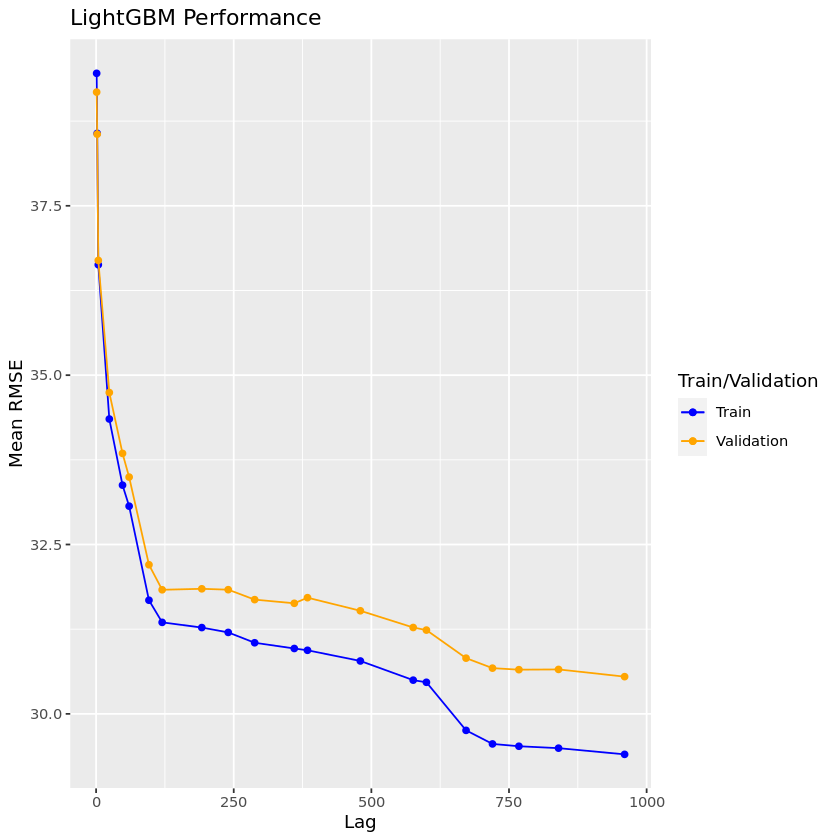

In [6]:
lightgbm_rmse_plot <- ggplot(lightgbm_lag_df) + 

    geom_point(aes(x=lag, y=train_rmse, col='Train')) +
    geom_line(aes(x=lag, y=train_rmse, col='Train')) +
    geom_point(aes(x=lag, y=val_rmse, col='Validation')) +
    geom_line(aes(x=lag, y=val_rmse, col='Validation')) +
    labs(x="Lag", y="Mean RMSE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_rmse_plot

In [7]:
ggsave("Results/Global/LightGBM Default/mean_rmse_lag_plot.png", 
       lightgbm_rmse_plot, width=9, height=6)

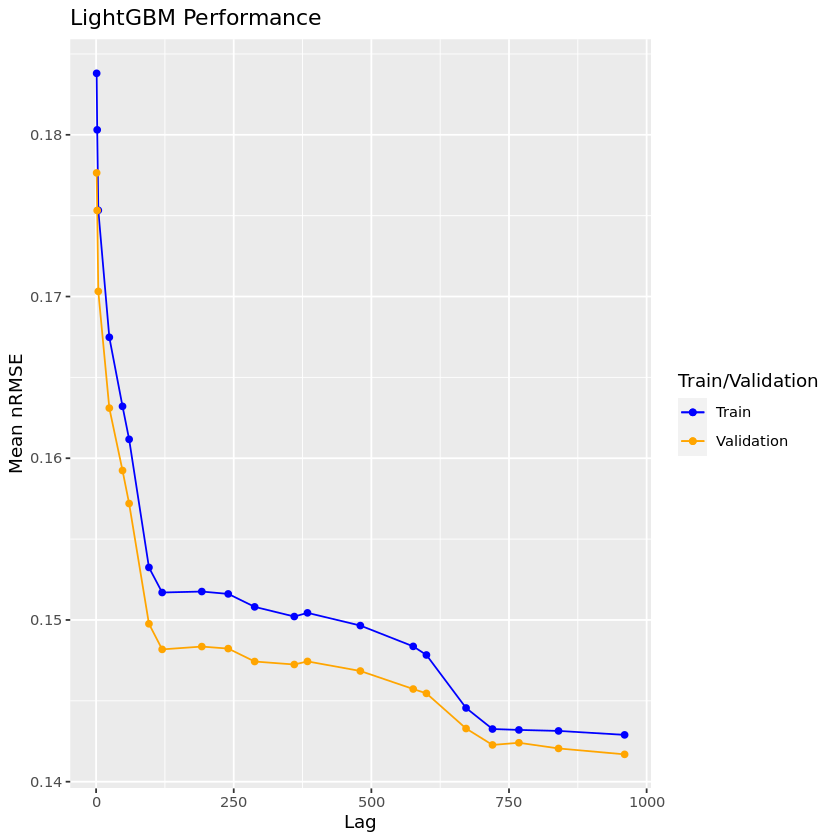

In [8]:
lightgbm_rmse_scaled_plot <- ggplot(lightgbm_lag_df) + 
    geom_point(aes(x=lag, y=train_nrmse, col='Train')) +
    geom_line(aes(x=lag, y=train_nrmse, col='Train')) +
    geom_point(aes(x=lag, y=val_nrmse, col='Validation')) +
    geom_line(aes(x=lag, y=val_nrmse, col='Validation')) +
    labs(x="Lag", y="Mean nRMSE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_rmse_scaled_plot

In [10]:
ggsave("Results/Global/LightGBM Default/mean_rmse_scaled_lag_plot.png", 
       lightgbm_rmse_scaled_plot, width=9, height=6)

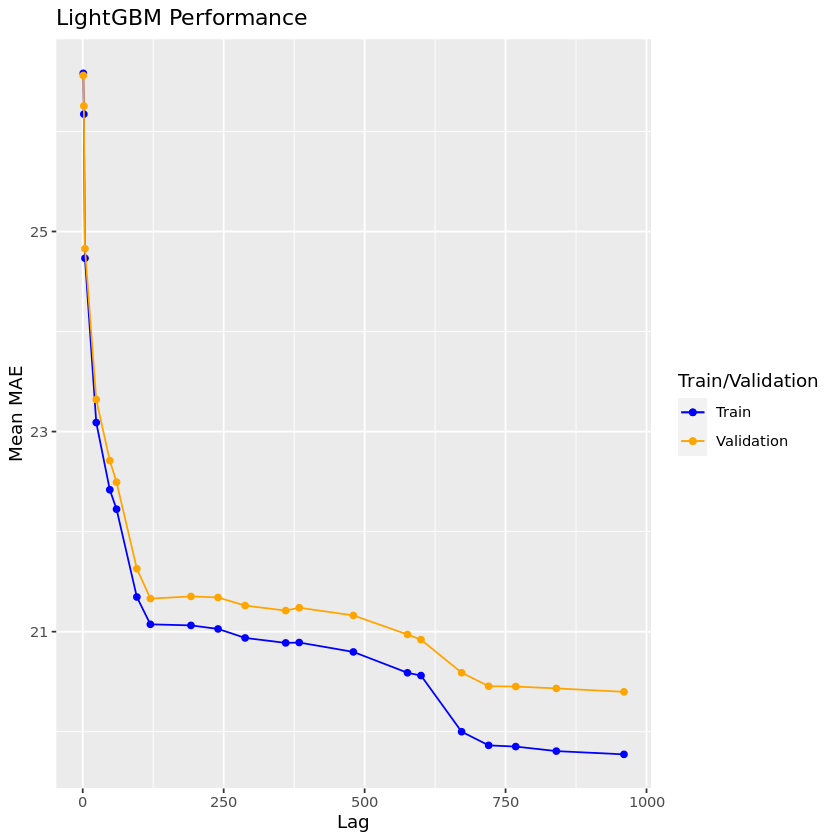

In [11]:
lightgbm_mae_plot <- ggplot(lightgbm_lag_df) + 

    geom_point(aes(x=lag, y=train_mae, col='Train')) +
    geom_line(aes(x=lag, y=train_mae, col='Train')) +
    geom_point(aes(x=lag, y=val_mae, col='Validation')) +
    geom_line(aes(x=lag, y=val_mae, col='Validation')) +
    labs(x="Lag", y="Mean MAE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_mae_plot

In [12]:
ggsave("Results/Global/LightGBM Default/mean_mae_lag_plot.png", 
       lightgbm_mae_plot, width=9, height=6)

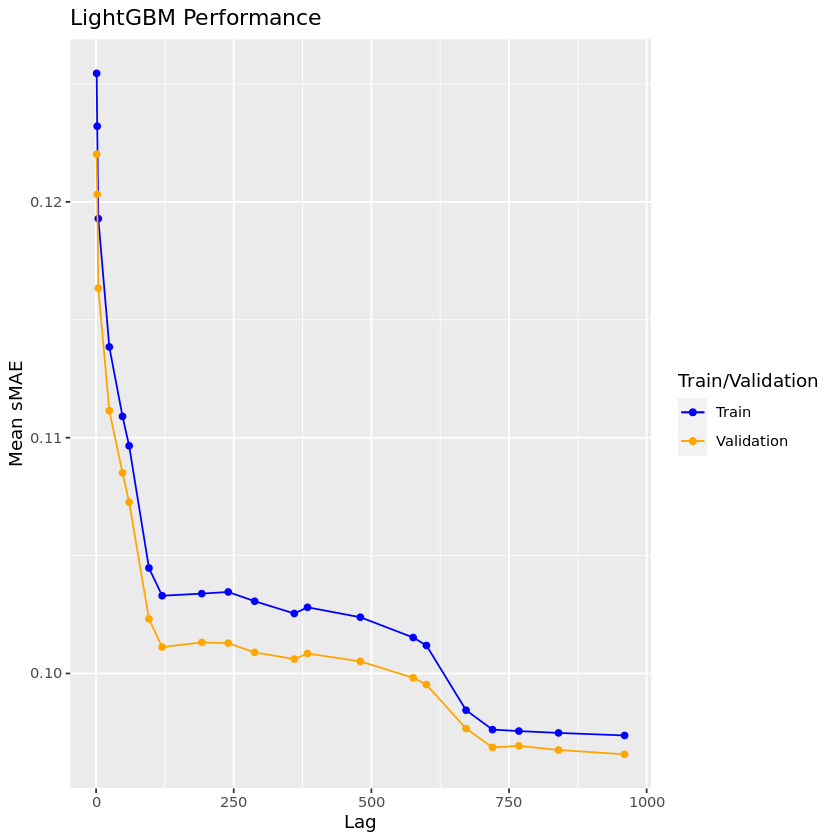

In [13]:
lightgbm_mae_scaled_plot <- ggplot(lightgbm_lag_df) + 
    geom_point(aes(x=lag, y=train_smae, col='Train')) +
    geom_line(aes(x=lag, y=train_smae, col='Train')) +
    geom_point(aes(x=lag, y=val_smae, col='Validation')) +
    geom_line(aes(x=lag, y=val_smae, col='Validation')) +
    labs(x="Lag", y="Mean sMAE", title="LightGBM Performance",  color = "Train/Val") + 
    scale_color_manual(name='Train/Validation',
                       breaks=c('Train', 'Validation'),
                       values=c('Train'='blue', 'Validation'='orange'))

lightgbm_mae_scaled_plot

In [14]:
ggsave("Results/Global/LightGBM Default/mean_mae_scaled_lag_plot.png", 
       lightgbm_mae_scaled_plot, width=9, height=6)

## Best Model Full Data Test Preds

In [7]:
lgbm_best_full <- read_csv('Results/LightGBM Full/best_mod_test_preds.csv')

Rows: 102144 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): index, actual, forecast, median_forecast, lo_95, hi_95, lo_80, hi_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
lgbm_best_full %>% arrange(int_95_sym) %>% select(ts_index, index, int_95_sym)

ts_index,index,int_95_sym
<dbl>,<dbl>,<dbl>
71,7777,0.0001885088
52,7806,0.0001902604
42,8048,0.0002434542
62,7872,0.0004108980
64,7832,0.0005239801
3,6803,0.0006532703
72,6776,0.0008215795
42,7490,0.0008340867
2,7982,0.0008577435


In [9]:
lgbm_best_full %>% filter(ts_index==71) %>% arrange(desc(int_95_sym)) %>% select(index, int_95_sym)

index,int_95_sym
<dbl>,<dbl>
7742,27.20554
7553,26.21940
6877,20.46135
8011,20.36605
7653,19.61189
8033,19.18198
6969,18.49995
7801,18.24837
7524,17.77406


In [9]:
ts27 = lgbm_best_full %>% filter(ts_index==27)

In [10]:
head(ts27)

index,actual,forecast,median_forecast,lo_95,hi_95,lo_80,hi_80,ts_index,lo_95_dist,⋯,hi_80_dist,int_95_sym,int_80_sym,lo_95_dist_med,hi_95_dist_med,lo_80_dist_med,hi_80_dist_med,int_95_sym_med,int_80_sym_med,median_mean_diff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6720,1229,1217.652,1211.196,1037.9789,1297.790,1096.692,1276.665,27,179.6734,⋯,59.01298,99.53552,61.9475156,173.2167,86.59451,114.50382,65.46965,86.62218,49.03417,6.456673
6721,1204,1262.638,1248.182,1068.6927,1315.028,1148.500,1337.354,27,193.9455,⋯,74.71619,141.55550,39.4220718,179.4889,66.84659,99.68164,89.17280,112.64227,10.50884,14.456614
6722,1193,1212.868,1233.008,1004.1547,1304.208,1122.636,1277.480,27,208.7135,⋯,64.61219,117.37351,25.6200051,228.8529,71.20055,110.37162,44.47277,157.65236,65.89885,20.139424
6723,1193,1172.926,1195.147,1024.6728,1298.049,1108.056,1238.288,27,148.2536,⋯,65.36151,23.13044,0.4912082,170.4739,102.90281,87.09061,43.14120,67.57106,43.94941,22.220308
6724,1167,1183.972,1188.641,1011.7240,1288.537,1080.897,1244.366,27,172.2484,⋯,60.39391,67.68361,42.6813780,176.9174,99.89581,107.74428,55.72491,77.02160,52.01937,4.668997
6725,1148,1162.494,1155.383,993.4239,1277.596,1062.773,1264.711,27,169.0704,⋯,102.21621,53.96861,2.4951184,161.9596,122.21266,92.61025,109.32704,39.74694,16.71679,7.110835


In [31]:
ts_27_plt = ggplot(ts27 %>% filter(index>=7450) %>% filter(index<=7650)) + 
    geom_line(aes(x=index, y=lo_95), linetype=2, col='grey') +
    geom_line(aes(x=index, y=hi_95), linetype=2, col='grey') + 
    geom_ribbon(aes(x=index, ymin=lo_95, ymax=hi_95),  fill='grey', alpha = 0.4) +
    geom_line(aes(x=index, y=forecast)) +
    ylab("forecast w 95% pi")

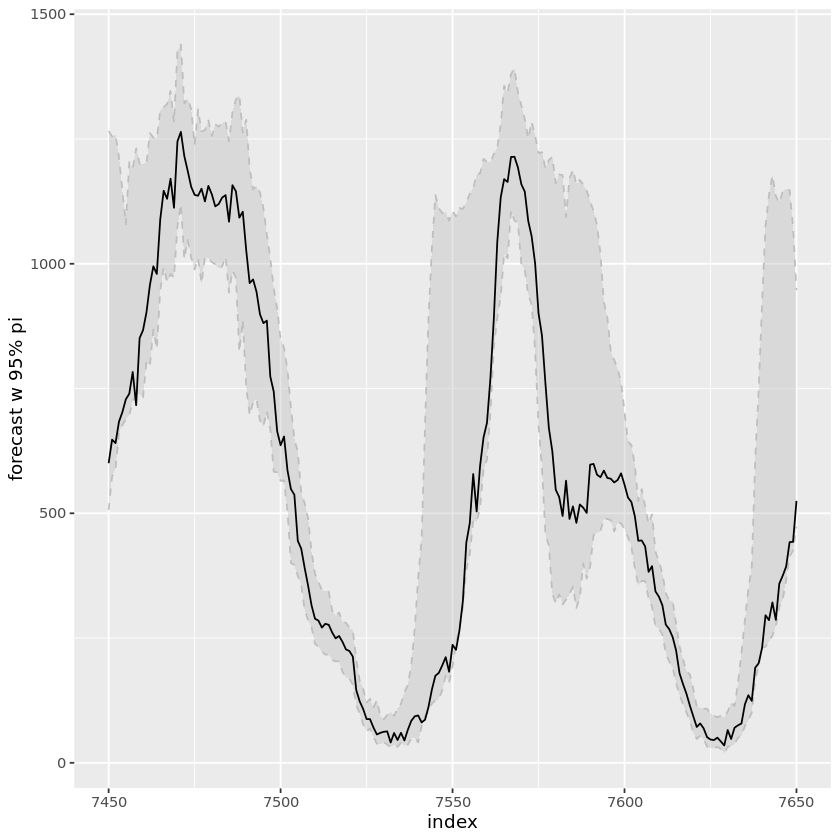

In [32]:
ts_27_plt

In [33]:
ts71 = lgbm_best_full %>% filter(ts_index==71)

In [34]:
ts_71_plt = ggplot(ts71 %>% filter(index>=7550) %>% filter(index<=7750)) + 
    geom_line(aes(x=index, y=lo_95), linetype=2, col='grey') +
    geom_line(aes(x=index, y=hi_95), linetype=2, col='grey') + 
    geom_ribbon(aes(x=index, ymin=lo_95, ymax=hi_95),  fill='grey', alpha = 0.4) +
    geom_line(aes(x=index, y=forecast)) +
    ylab("forecast w 95% pi")

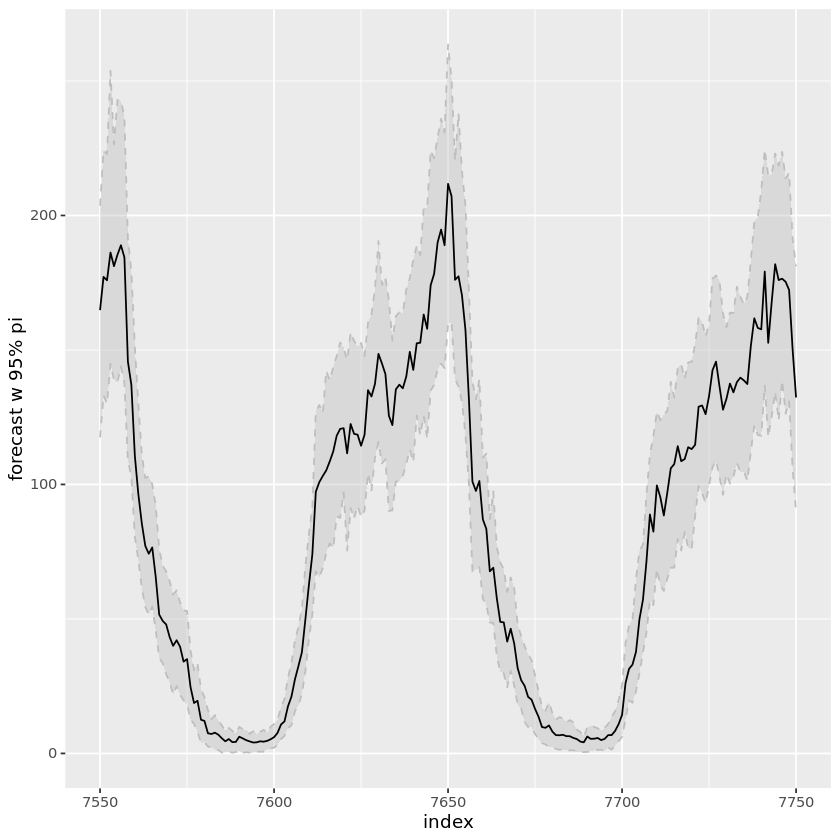

In [35]:
ts_71_plt

In [25]:
ggsave("Results/LightGBM Full/ts16_test_plot.png",
       ts_16_plt, width=9, height=6)

In [33]:
ts_16_plt2 = ggplot(ts16 %>% filter(index>=7175) %>% filter(index<7225)) + 
    geom_line(aes(x=index, y=lo_95), linetype=2, col='grey') +
    geom_line(aes(x=index, y=hi_95), linetype=2, col='grey') + 
    geom_ribbon(aes(x=index, ymin=lo_95, ymax=hi_95),  fill='grey', alpha = 0.4) +
    geom_line(aes(x=index, y=forecast)) 

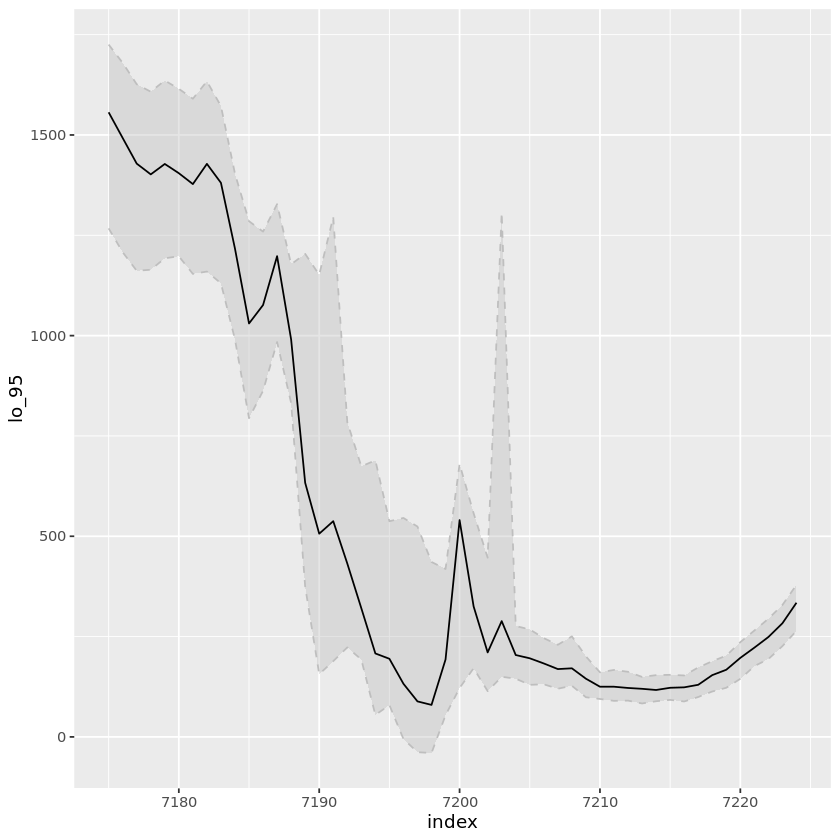

In [34]:
ts_16_plt2

In [30]:
ts31 = lgbm_best_full %>% filter(ts_index==31)

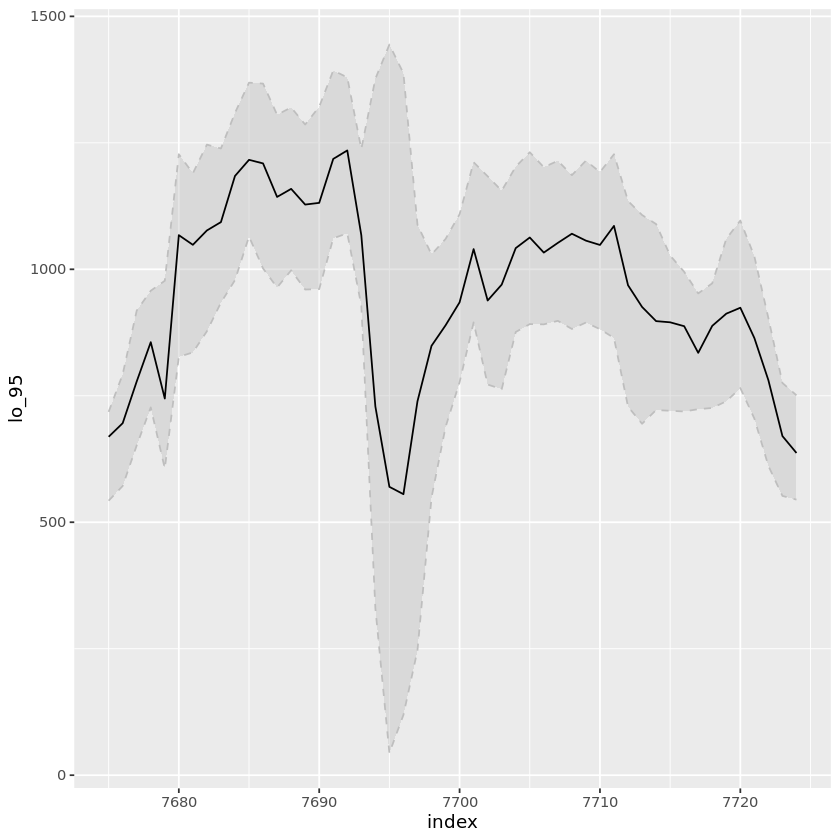

In [32]:
ggplot(ts31 %>% filter(index>=7675) %>% filter(index<7725)) + 
    geom_line(aes(x=index, y=lo_95), linetype=2, col='grey') +
    geom_line(aes(x=index, y=hi_95), linetype=2, col='grey') + 
    geom_ribbon(aes(x=index, ymin=lo_95, ymax=hi_95),  fill='grey', alpha = 0.4) +
    geom_line(aes(x=index, y=forecast)) 

# LGBM Rand Search

In [23]:
df = read_csv("Results/LightGBM Full/rand_search_mod_perf.csv")

Rows: 38000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): model_no, ts_idx, train_mean, train_rmse, train_mae, val_mean, val_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [24]:
df <- df %>% mutate(val_nrmse=val_rmse/val_mean) 
df <- df %>% mutate(train_nrmse=train_rmse/train_mean)

In [25]:
df <- df %>% group_by(model_no) %>% summarise_all(mean) %>% ungroup()

In [26]:
head(df)

model_no,ts_idx,train_mean,train_rmse,train_mae,val_mean,val_rmse,val_mae,val_nrmse,train_nrmse
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,38.5,264.3094,209.35817,177.39025,267.6014,209.43713,177.40983,1.3121483,1.3879777
1,38.5,264.3094,25.08733,17.17537,267.6014,30.56936,20.19184,0.1387749,0.1302764
2,38.5,264.3094,27.05997,18.46160,267.6014,30.04404,19.98160,0.1390254,0.1366700
3,38.5,264.3094,22.85337,16.01281,267.6014,29.70789,19.70065,0.1365665,0.1254119
4,38.5,264.3094,33.56168,22.47192,267.6014,34.74437,23.23615,0.1609793,0.1611159
5,38.5,264.3094,26.37714,18.07613,267.6014,31.47401,20.89335,0.1424470,0.1351868


In [27]:
df <- df %>% mutate(nrmse_diff=train_nrmse-val_nrmse)

In [28]:
lag_df <- read_csv("Results/LightGBM Full/lag_model_performance.csv")

Rows: 21 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (17): lag, mean_train_rmse_list, mean_train_mae_list, mean_train_rmse_sc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [29]:
target_train_nrmse = (lag_df %>% filter(lag==840) %>% select(mean_train_rmse_scaled_list))$mean_train_rmse_scaled_list
target_val_nrmse = (lag_df %>% filter(lag==840) %>% select(mean_val_rmse_scaled_list))$mean_val_rmse_scaled_list
target_train_val_diff = target_val_nrmse - target_train_nrmse

In [20]:
target_train_nrmse

[1] 0.1446309

In [21]:
target_val_nrmse

[1] 0.1501831

In [22]:
target_train_val_diff

[1] 0.005552179

In [30]:
df <- df %>% filter(train_nrmse<=target_train_nrmse) %>%
    filter(val_nrmse<=target_val_nrmse)

In [31]:
nrow(df)

[1] 155

In [32]:
head(df)

model_no,ts_idx,train_mean,train_rmse,train_mae,val_mean,val_rmse,val_mae,val_nrmse,train_nrmse,nrmse_diff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38.5,264.3094,25.08733,17.17537,267.6014,30.56936,20.19184,0.1387749,0.1302764,-0.0084985085
2,38.5,264.3094,27.05997,18.46160,267.6014,30.04404,19.98160,0.1390254,0.1366700,-0.0023554165
3,38.5,264.3094,22.85337,16.01281,267.6014,29.70789,19.70065,0.1365665,0.1254119,-0.0111545938
5,38.5,264.3094,26.37714,18.07613,267.6014,31.47401,20.89335,0.1424470,0.1351868,-0.0072601748
7,38.5,264.3094,28.36873,19.12154,267.6014,30.21206,20.03516,0.1394892,0.1390174,-0.0004717548
10,38.5,264.3094,27.36893,18.67830,267.6014,30.60044,20.37236,0.1411079,0.1379750,-0.0031328662


In [33]:
nrow(df %>% filter(nrmse_diff <= target_train_val_diff))

[1] 155

In [19]:
df %>% arrange((val_nrmse)) %>% filter(abs(nrmse_diff) < 0.01)

model_no,ts_idx,train_mean,train_rmse,train_mae,val_mean,val_rmse,val_mae,val_nrmse,train_nrmse,nrmse_diff
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
443,38.5,264.3094,24.34076,16.92965,267.6014,29.75096,19.64997,0.1371444,0.1290829,-0.0080614810
251,38.5,264.3094,23.75615,16.52440,267.6014,29.93214,19.80775,0.1372635,0.1278313,-0.0094321244
148,38.5,264.3094,24.12656,16.58892,267.6014,30.24806,19.95170,0.1374731,0.1275318,-0.0099412201
267,38.5,264.3094,24.46428,16.95365,267.6014,30.08554,19.89643,0.1376730,0.1297224,-0.0079506216
356,38.5,264.3094,24.87602,17.18096,267.6014,30.03367,19.91550,0.1377490,0.1303835,-0.0073654287
297,38.5,264.3094,27.06053,18.32579,267.6014,29.91701,19.80959,0.1377733,0.1354293,-0.0023439390
454,38.5,264.3094,27.83038,18.68552,267.6014,30.01286,19.82826,0.1378608,0.1361534,-0.0017074515
247,38.5,264.3094,25.80918,17.76918,267.6014,29.84991,19.79904,0.1379337,0.1333665,-0.0045672630
125,38.5,264.3094,25.18272,17.29687,267.6014,30.13547,19.97267,0.1379759,0.1312222,-0.0067537436
